# **RMS Titanic (Royal Mail Ship Titanic)**

### Brytyjski transatlantyk typu Olympic w nocy z 14 na 15 kwietnia 1912 roku, podczas dziewiczego rejsu na trasie Southampton – Cherbourg – Queenstown – Nowy Jork, zderzył się z górą lodową i zatonął. Jego katastrofa spowodowała nowelizację zasad bezpieczeństwa morskiego. Dane o ofiarach są niejednoznaczne. Spośród około 2208 pasażerów i załogi „Titanica” zginęło około 1496 osób. Przeżyło katastrofę tylko około 712 [(źródło)](https://pl.wikipedia.org/wiki/RMS_Titanic).

## **Poniższa analiza została przeprowadzona na próbie liczącej 1310 pasażerów.**

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/2560px-RMS_Titanic_3.jpg)

# 1. **Ogólny przegląd danych**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1131,3.0,1.0,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0.0,0.0,SOTON/O.Q. 392078,8.0500,E10,S,9,NaN,NaN
87,1.0,1.0,"Daniel, Mr. Robert Williams",male,27.0,0.0,0.0,113804,30.5000,NaN,S,3,NaN,"Philadelphia, PA"
164,1.0,1.0,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0.0,0.0,111426,26.5500,NaN,C,15,NaN,"Indianapolis, IN"
531,2.0,0.0,"Pernot, Mr. Rene",male,NaN,0.0,0.0,SC/PARIS 2131,15.0500,NaN,C,NaN,NaN,NaN
1292,3.0,0.0,"Willey, Mr. Edward",male,NaN,0.0,0.0,S.O./P.P. 751,7.5500,NaN,S,NaN,NaN,NaN
1248,3.0,0.0,"Tikkanen, Mr. Juho",male,32.0,0.0,0.0,STON/O 2. 3101293,7.9250,NaN,S,NaN,NaN,NaN
1211,3.0,0.0,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1.0,4.0,347088,27.9000,NaN,S,NaN,NaN,NaN
106,1.0,0.0,"Farthing, Mr. John",male,NaN,0.0,0.0,PC 17483,221.7792,C95,S,NaN,NaN,NaN
49,1.0,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
1038,3.0,0.0,"Moutal, Mr. Rahamin Haim",male,NaN,0.0,0.0,374746,8.0500,NaN,S,NaN,NaN,NaN


In [3]:
# wyświetlenie podstawowaych informacji o danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
# sprawdzemoe ile jest wartości unikatowych
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

# 2. **Analiza brakujących wartości**

In [5]:
# sprawdzenie które kolumny mają braki i ile jest rzędów z brakami w danej kolumnie i ile to procent
df = df
brakujące_rzędy = df.isnull().sum()

braki_procent = (brakujące_rzędy / len(df)) * 100

podsumowanie_braków = pd.DataFrame({
    'brakujące rzędy': brakujące_rzędy,
    'braki wyrażone w procentach': braki_procent
})

result = {
    "type": "dataframe",
    "value": podsumowanie_braków
}
podsumowanie_braków

,brakujące rzędy,braki wyrażone w procentach
pclass,1,0.076336
survived,1,0.076336
name,1,0.076336
sex,1,0.076336
age,264,20.152672
sibsp,1,0.076336
parch,1,0.076336
ticket,1,0.076336
fare,2,0.152672
cabin,1015,77.480916


In [6]:
# sprawdzenie czy braki w kluczowych kolumnach dla analizy dotyczą konkretnego rzędu, czy też braki dotyczą kilku rzędów
filtered1_df = df[~df['sex'].notna()]
filtered1_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# usnięcie w kolumnach "survived" i "age" rzędów z brakami
df = df.dropna(subset=['survived', 'age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1046 non-null   float64
 1   survived   1046 non-null   float64
 2   name       1046 non-null   object 
 3   sex        1046 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1046 non-null   float64
 6   parch      1046 non-null   float64
 7   ticket     1046 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1044 non-null   object 
 11  boat       417 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(7), object(7)
memory usage: 122.6+ KB


# 3. **Transformacje danych**

In [8]:
# utworznie kolumny 'płeć' z wartościami 'kobieta'/'mężczyzna' na podstawie kolumny 'sex'
df['płeć'] = df['sex'].str.replace('female', 'kobieta').str.replace('male', 'mężczyzna')

In [9]:
# utworznie kolumny 'przeżycie str' jako string
df['przeżycie str'] = df['survived'].map({1.0: 'tak', 0.0: 'nie'})

In [10]:
# zmiana nazw kolumn
df = df.rename(columns={
    'pclass' : 'klasa biletu',
    'survived' : 'przeżycie int',
    'name' : 'imię i nazwisko',
    'age' : 'wiek',
    'sibsp' : 'liczba rodzeńtwa/małżonka',
    'parch' : 'liczba rodziców/dzieci',
    'ticket' : 'nr biletu',
    'fare' : 'cena biletu',
    'cabin' : 'nr kabiny',
    'embarked' : 'port początkowy',
    'boat' : 'nr łodzi ratunkowej',
    'body' : 'nr ciała',
    'home.dest' : 'miejsce docelowe'    
})
df

,klasa biletu,przeżycie int,imię i nazwisko,sex,wiek,liczba rodzeńtwa/małżonka,liczba rodziców/dzieci,nr biletu,cena biletu,nr kabiny,port początkowy,nr łodzi ratunkowej,nr ciała,miejsce docelowe,płeć,przeżycie str
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",kobieta,tak
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",mężczyzna,tak
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",kobieta,nie
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",mężczyzna,nie
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",kobieta,nie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN,mężczyzna,nie
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,kobieta,nie
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,mężczyzna,nie
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,mężczyzna,nie


In [11]:
# oporządkowanie kolejności kolumn
df = df[['imię i nazwisko', 'przeżycie str', 'przeżycie int', 'płeć', 'wiek', 'liczba rodzeńtwa/małżonka', 'liczba rodziców/dzieci', 'klasa biletu', 'cena biletu', 'nr biletu', 'nr kabiny', 'port początkowy', 'nr łodzi ratunkowej', 'nr ciała', 'miejsce docelowe']]
df

,imię i nazwisko,przeżycie str,przeżycie int,płeć,wiek,liczba rodzeńtwa/małżonka,liczba rodziców/dzieci,klasa biletu,cena biletu,nr biletu,nr kabiny,port początkowy,nr łodzi ratunkowej,nr ciała,miejsce docelowe
0,"Allen, Miss. Elisabeth Walton",tak,1.0,kobieta,29.0000,0.0,0.0,1.0,211.3375,24160,B5,S,2,NaN,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",tak,1.0,mężczyzna,0.9167,1.0,2.0,1.0,151.5500,113781,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",nie,0.0,kobieta,2.0000,1.0,2.0,1.0,151.5500,113781,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",nie,0.0,mężczyzna,30.0000,1.0,2.0,1.0,151.5500,113781,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",nie,0.0,kobieta,25.0000,1.0,2.0,1.0,151.5500,113781,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",nie,0.0,mężczyzna,45.5000,0.0,0.0,3.0,7.2250,2628,NaN,C,NaN,312.0,NaN
1304,"Zabour, Miss. Hileni",nie,0.0,kobieta,14.5000,1.0,0.0,3.0,14.4542,2665,NaN,C,NaN,328.0,NaN
1306,"Zakarian, Mr. Mapriededer",nie,0.0,mężczyzna,26.5000,0.0,0.0,3.0,7.2250,2656,NaN,C,NaN,304.0,NaN
1307,"Zakarian, Mr. Ortin",nie,0.0,mężczyzna,27.0000,0.0,0.0,3.0,7.2250,2670,NaN,C,NaN,NaN,NaN


In [12]:
# wyświetlenie duplikatów
df[df.duplicated()]
# brak duplikatów

,imię i nazwisko,przeżycie str,przeżycie int,płeć,wiek,liczba rodzeńtwa/małżonka,liczba rodziców/dzieci,klasa biletu,cena biletu,nr biletu,nr kabiny,port początkowy,nr łodzi ratunkowej,nr ciała,miejsce docelowe


# 4. **Analiza statystyczna**

## 4.1. Ogólne cechy danych liczbowych

In [13]:
df.describe()

,przeżycie int,wiek,liczba rodzeńtwa/małżonka,liczba rodziców/dzieci,klasa biletu,cena biletu,nr ciała
count,1046.000000,1046.000000,1046.000000,1046.00000,1046.000000,1045.000000,120.00000
mean,0.408222,29.881135,0.502868,0.42065,2.207457,36.686080,160.87500
std,0.491740,14.413500,0.912167,0.83975,0.841497,55.732533,98.10392
min,0.000000,0.166700,0.000000,0.00000,1.000000,0.000000,1.00000
25%,0.000000,21.000000,0.000000,0.00000,1.000000,8.050000,71.50000
50%,0.000000,28.000000,0.000000,0.00000,2.000000,15.750000,155.50000
75%,1.000000,39.000000,1.000000,1.00000,3.000000,35.500000,256.50000
max,1.000000,80.000000,8.000000,6.00000,3.000000,512.329200,328.00000


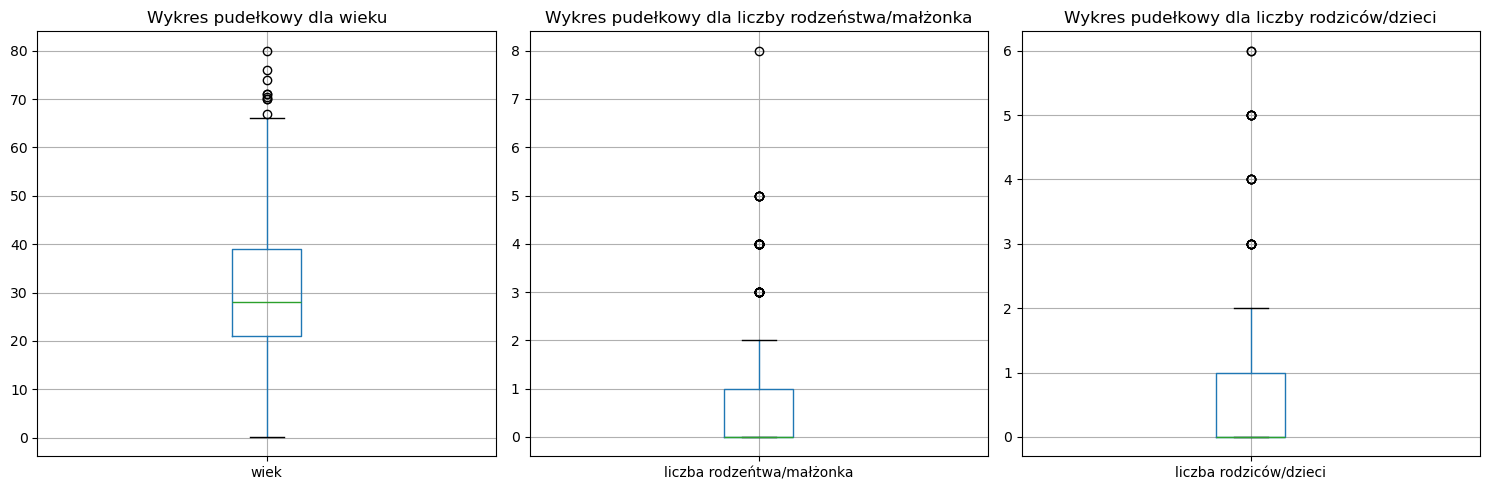

In [14]:
df = df

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df.boxplot(column='wiek', ax=axes[0])
axes[0].set_title('Wykres pudełkowy dla wieku')

df.boxplot(column='liczba rodzeńtwa/małżonka', ax=axes[1])
axes[1].set_title('Wykres pudełkowy dla liczby rodzeństwa/małżonka')

df.boxplot(column='liczba rodziców/dzieci', ax=axes[2])
axes[2].set_title('Wykres pudełkowy dla liczby rodziców/dzieci')

plt.tight_layout()
plt.savefig('box_plots.png')

In [15]:
osoby_najstarsze_df = df[df['wiek'] > 66]
osoby_najstarsze_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 9 to 1235
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imię i nazwisko            9 non-null      object 
 1   przeżycie str              9 non-null      object 
 2   przeżycie int              9 non-null      float64
 3   płeć                       9 non-null      object 
 4   wiek                       9 non-null      float64
 5   liczba rodzeńtwa/małżonka  9 non-null      float64
 6   liczba rodziców/dzieci     9 non-null      float64
 7   klasa biletu               9 non-null      float64
 8   cena biletu                9 non-null      float64
 9   nr biletu                  9 non-null      object 
 10  nr kabiny                  5 non-null      object 
 11  port początkowy            9 non-null      object 
 12  nr łodzi ratunkowej        2 non-null      object 
 13  nr ciała                   4 non-null      float64


In [16]:
procent_osoby_najstarsze_df = (len(osoby_najstarsze_df) / len(df)) * 100
procent_osoby_najstarsze_df

0.8604206500956023

In [17]:
liczba_rodzenstwa_małżonka1_df = df[df['liczba rodzeńtwa/małżonka'] >= 1]
liczba_rodzenstwa_małżonka1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 1 to 1304
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imię i nazwisko            361 non-null    object 
 1   przeżycie str              361 non-null    object 
 2   przeżycie int              361 non-null    float64
 3   płeć                       361 non-null    object 
 4   wiek                       361 non-null    float64
 5   liczba rodzeńtwa/małżonka  361 non-null    float64
 6   liczba rodziców/dzieci     361 non-null    float64
 7   klasa biletu               361 non-null    float64
 8   cena biletu                361 non-null    float64
 9   nr biletu                  361 non-null    object 
 10  nr kabiny                  119 non-null    object 
 11  port początkowy            361 non-null    object 
 12  nr łodzi ratunkowej        171 non-null    object 
 13  nr ciała                   30 non-null     float6

In [18]:
procent_liczba_rodzenstwa_małżonka1_df = (len(liczba_rodzenstwa_małżonka1_df) / len(df)) * 100
procent_liczba_rodzenstwa_małżonka1_df

34.512428298279154

In [19]:
liczba_rodzenstwa_małżonka2_df = df[df['liczba rodzeńtwa/małżonka'] >2]
liczba_rodzenstwa_małżonka2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 111 to 1274
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imię i nazwisko            45 non-null     object 
 1   przeżycie str              45 non-null     object 
 2   przeżycie int              45 non-null     float64
 3   płeć                       45 non-null     object 
 4   wiek                       45 non-null     float64
 5   liczba rodzeńtwa/małżonka  45 non-null     float64
 6   liczba rodziców/dzieci     45 non-null     float64
 7   klasa biletu               45 non-null     float64
 8   cena biletu                45 non-null     float64
 9   nr biletu                  45 non-null     object 
 10  nr kabiny                  4 non-null      object 
 11  port początkowy            45 non-null     object 
 12  nr łodzi ratunkowej        7 non-null      object 
 13  nr ciała                   2 non-null      float

In [20]:
procent_liczba_rodzenstwa_małżonka2_df = (len(liczba_rodzenstwa_małżonka2_df) / len(df)) * 100
procent_liczba_rodzenstwa_małżonka2_df

4.3021032504780115

In [21]:
liczba_rodziców_dzieci1_df = df[df['liczba rodziców/dzieci'] < 1]
liczba_rodziców_dzieci1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imię i nazwisko            768 non-null    object 
 1   przeżycie str              768 non-null    object 
 2   przeżycie int              768 non-null    float64
 3   płeć                       768 non-null    object 
 4   wiek                       768 non-null    float64
 5   liczba rodzeńtwa/małżonka  768 non-null    float64
 6   liczba rodziców/dzieci     768 non-null    float64
 7   klasa biletu               768 non-null    float64
 8   cena biletu                767 non-null    float64
 9   nr biletu                  768 non-null    object 
 10  nr kabiny                  184 non-null    object 
 11  port początkowy            766 non-null    object 
 12  nr łodzi ratunkowej        262 non-null    object 
 13  nr ciała                   102 non-null    float6

In [22]:
procent_liczba_rodziców_dzieci1_df  = (len(liczba_rodziców_dzieci1_df ) / len(df)) * 100
procent_liczba_rodziców_dzieci1_df

73.4225621414914

In [23]:
liczba_rodziców_dzieci2_df = df[df['liczba rodziców/dzieci'] == 2]
liczba_rodziców_dzieci2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 1265
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imię i nazwisko            97 non-null     object 
 1   przeżycie str              97 non-null     object 
 2   przeżycie int              97 non-null     float64
 3   płeć                       97 non-null     object 
 4   wiek                       97 non-null     float64
 5   liczba rodzeńtwa/małżonka  97 non-null     float64
 6   liczba rodziców/dzieci     97 non-null     float64
 7   klasa biletu               97 non-null     float64
 8   cena biletu                97 non-null     float64
 9   nr biletu                  97 non-null     object 
 10  nr kabiny                  29 non-null     object 
 11  port początkowy            97 non-null     object 
 12  nr łodzi ratunkowej        55 non-null     object 
 13  nr ciała                   5 non-null      float64

In [24]:
procent_liczba_rodziców_dzieci2_df  = (len(liczba_rodziców_dzieci2_df ) / len(df)) * 100
procent_liczba_rodziców_dzieci2_df

9.27342256214149

In [25]:
df = df
numeric_df = df.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,przeżycie int,wiek,liczba rodzeńtwa/małżonka,liczba rodziców/dzieci,klasa biletu,cena biletu,nr ciała
przeżycie int,1.000000,-0.055513,-0.012213,0.114438,-0.320486,0.249164,NaN
wiek,-0.055513,1.000000,-0.243699,-0.150917,-0.408106,0.178739,0.058809
liczba rodzeńtwa/małżonka,-0.012213,-0.243699,1.000000,0.374456,0.047221,0.141184,-0.100289
liczba rodziców/dzieci,0.114438,-0.150917,0.374456,1.000000,0.017224,0.216723,0.050902
klasa biletu,-0.320486,-0.408106,0.047221,0.017224,1.000000,-0.565255,-0.034122
cena biletu,0.249164,0.178739,0.141184,0.216723,-0.565255,1.000000,-0.043514
nr ciała,NaN,0.058809,-0.100289,0.050902,-0.034122,-0.043514,1.000000


## Wnioski
- Wiek pasażerów w badanej próbie mieści się w przedziale od 0,17 do 80 lat, przy czym osoby najstarsze (powyżej 66 lat) stanowią pojedyncze przypadki (9 przypadków, co stanowi 0,86% wszystkich badanych pasażerów).
- W większości przypadków pasażerami były osoby samotne, tzn. podróżujące bez małżonka, dzieci czy rodziców (tylko 34,51% badanych pasażerów podróżowało z małżonkiem lub rodzeństwem, a 4,3% osób miało więcej niż 2 rodzeństwa).
- Z dwójką rodziców lub z dwójką dzieci podróżowało 9,27% pasażerów.
- Korelacja surowych danych nie wykazała zależności między zmiennymi.

## 4.2. Zależność przeżycia od klasy biletu

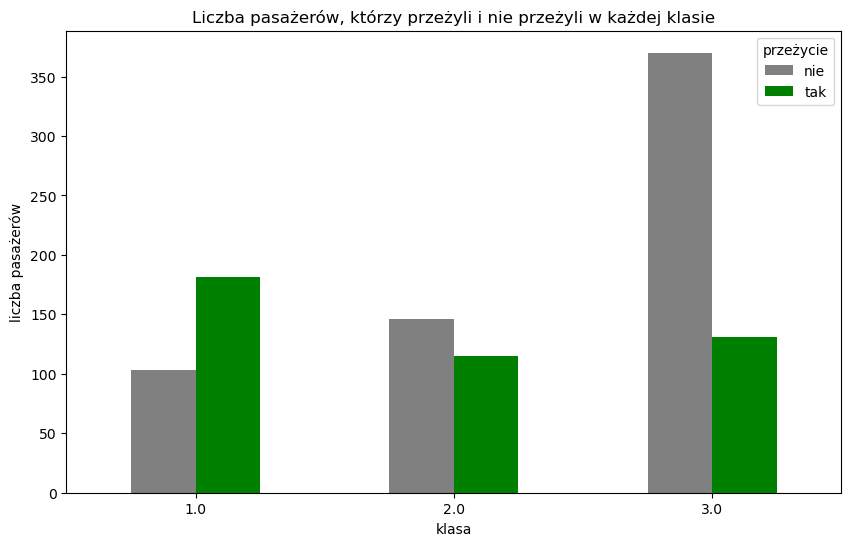

In [26]:
df = df

grouped = df.groupby(['klasa biletu', 'przeżycie str']).size().unstack()

colors = ['grey', 'green']
ax = grouped.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
plt.title('Liczba pasażerów, którzy przeżyli i nie przeżyli w każdej klasie')
plt.xlabel('klasa')
plt.ylabel('liczba pasażerów')
plt.xticks(rotation=0)
plt.legend(title='przeżycie')

plt.savefig('survival_by_class.png')

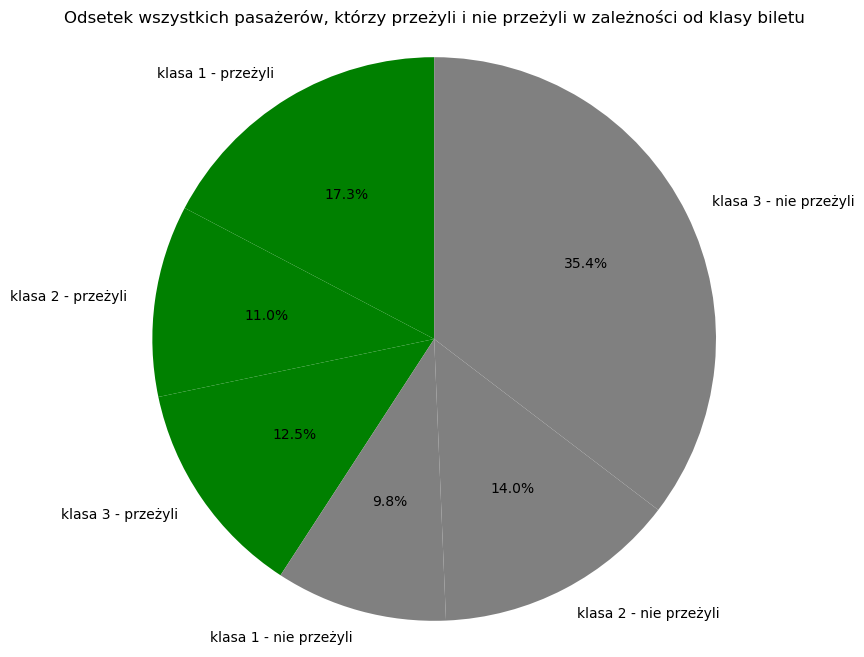

In [27]:
df['klasa_przeżycie'] = df.apply(lambda row: f"klasa {int(row['klasa biletu'])} - {'przeżyli' if row['przeżycie int'] == 1 else 'nie przeżyli'}", axis=1)

class_survival_counts = df['klasa_przeżycie'].value_counts()

order = ['klasa 1 - przeżyli', 'klasa 2 - przeżyli', 'klasa 3 - przeżyli', 'klasa 1 - nie przeżyli', 'klasa 2 - nie przeżyli', 'klasa 3 - nie przeżyli']
class_survival_counts = class_survival_counts.reindex(order)

colors = ['green', 'green', 'green', 'grey', 'grey', 'grey']

plt.figure(figsize=(8, 8))
plt.pie(class_survival_counts, labels=class_survival_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Odsetek wszystkich pasażerów, którzy przeżyli i nie przeżyli w zależności od klasy biletu')
plt.axis('equal')  

plt.savefig('class_survival_distribution.png')

### Odsetek osób z biletem w danej klasie, które przeżyły lub zginęły

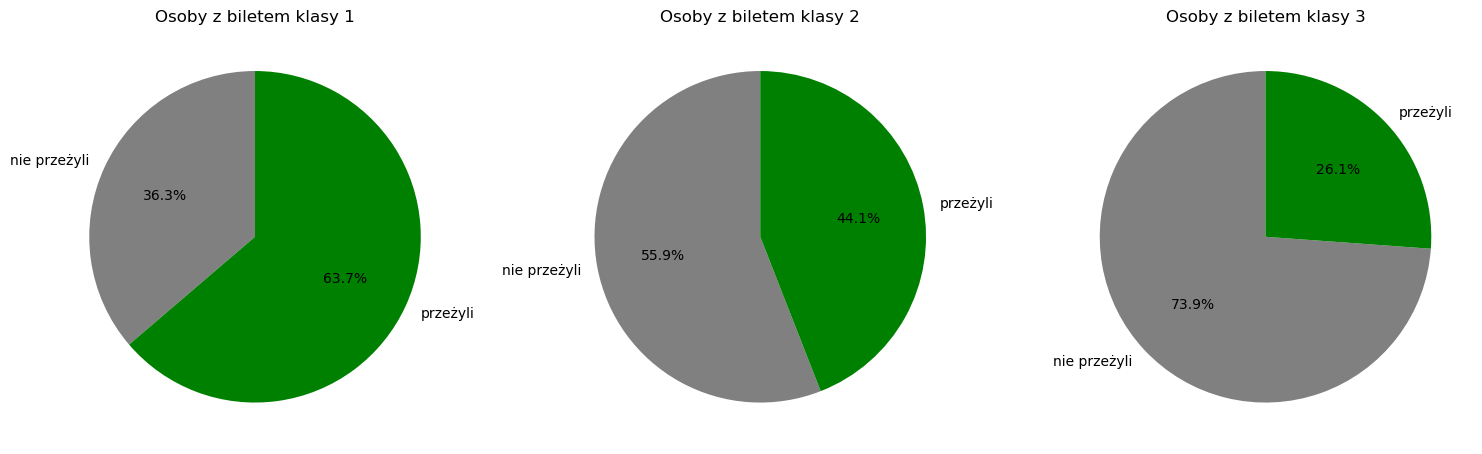

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ['grey', 'green']
for i, klasa in enumerate(grouped.index):
    axes[i].pie(grouped.loc[klasa], labels=['nie przeżyli', 'przeżyli'], colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Osoby z biletem klasy {int(klasa)}')

plt.tight_layout()
plt.savefig('survival_by_class2.png')

## Wnioski
- W badanej próbie najwięcej było osób z biletem klasy 3.
- Prawie 60% wszystkich pasażerów nie przeżyło, przy czym zdecydowaną większość (35,4% wszystkich pasażerów) stanowili pasażerowie z biletmi klasy 3.
- Spośród 40% pasażerów, którzy ocaleli, największy udział miały osoby z biletem klasy 1.
- Wykres "Odsetek osób z biletem w danej klasie, które przeżyły lub zginęły" pokazuje, że największą szansę przeżycia mieli pasażerowie z biletami klasy 1 (63,7% z tych osób przeżyło), natomiast najmniejszą szansę przeżycia miały osoby z biletami klasy 3 (tylko 26,1% z nich przeżyło)

## 4.2. Zależność przeżycia od płci

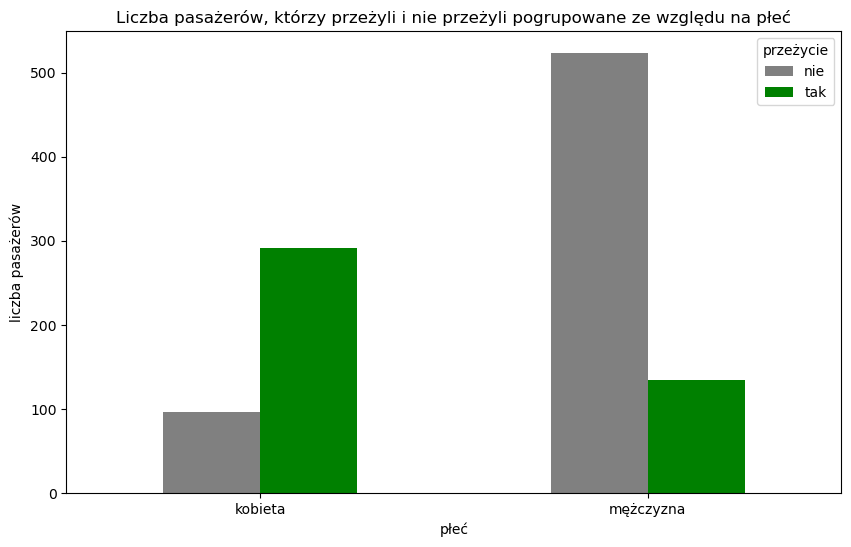

In [29]:
df = df

grouped = df.groupby(['płeć', 'przeżycie str']).size().unstack()

colors = ['grey', 'green']
ax = grouped.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
plt.title('Liczba pasażerów, którzy przeżyli i nie przeżyli pogrupowane ze względu na płeć')
plt.xlabel('płeć')
plt.ylabel('liczba pasażerów')
plt.xticks(rotation=0)
plt.legend(title='przeżycie')

plt.savefig('survival_by_class3.png')

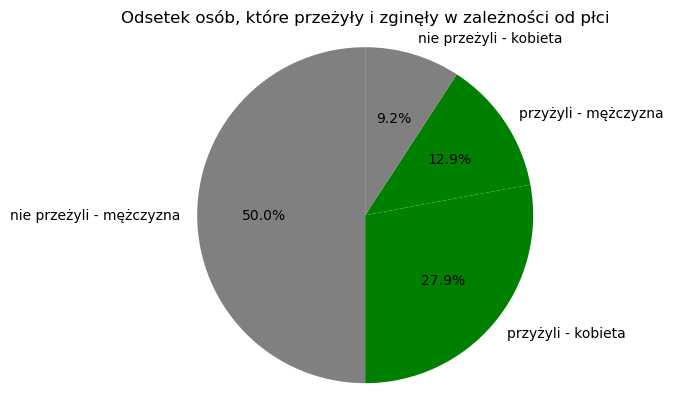

In [30]:
df['status_gender'] = df.apply(lambda row: f"{'przyżyli' if row['przeżycie int'] == 1 else 'nie przeżyli'} - {row['płeć']}", axis=1)

status_gender_counts = df['status_gender'].value_counts()

colors = ['grey', 'green', 'green', 'grey']

fig, ax = plt.subplots()
ax.pie(status_gender_counts, labels=status_gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  

plt.title('Odsetek osób, które przeżyły i zginęły w zależności od płci')
plt.savefig("survival_gender_pie_chart.png")

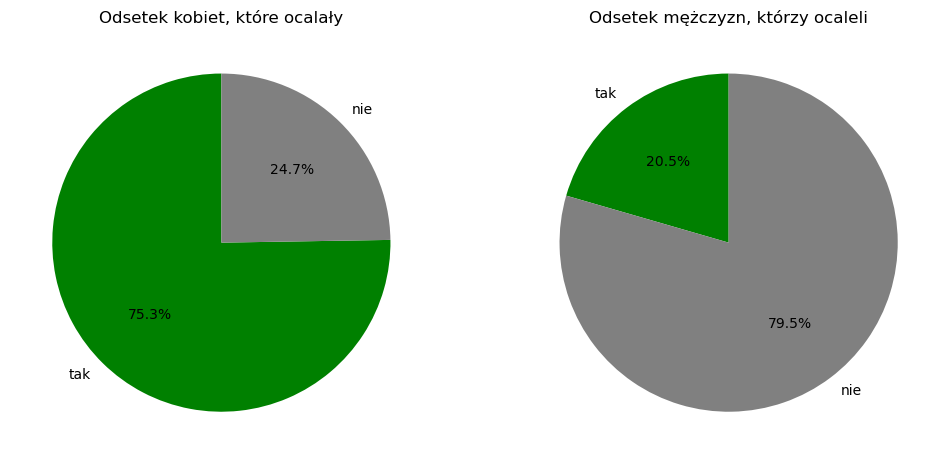

In [31]:
female_survived = df[(df['płeć'] == 'kobieta') & (df['przeżycie int'] == 1)].shape[0]
female_not_survived = df[(df['płeć'] == 'kobieta') & (df['przeżycie int'] == 0)].shape[0]
male_survived = df[(df['płeć'] == 'mężczyzna') & (df['przeżycie int'] == 1)].shape[0]
male_not_survived = df[(df['płeć'] == 'mężczyzna') & (df['przeżycie int'] == 0)].shape[0]

# wykres kołowy
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['green', 'grey']
# dla kobiet
axs[0].pie([female_survived, female_not_survived], labels=['tak', 'nie'], colors=colors, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Odsetek kobiet, które ocalały')

# dla męźczyzn
axs[1].pie([male_survived, male_not_survived], labels=['tak', 'nie'], colors=colors, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Odsetek mężczyzn, którzy ocaleli')

plt.savefig('survival_pie_charts.png')

## Wnioski
- W badanej próbie dominowali liczebnie mężczyźni, jednak większość z mężczyzn (79,5%) nie przeżyła katostrofy.
- Odmienną zależność można zaobserwować z grupie kobiet, tzn. większość z nich przeżyła (75,3% wszystkich kobiet).
- Mężczyźni, którzy zginęli stanowią 50,0% wszystkich pasażerów, natomiast kobiety, które zginęły 9,2%.
- Spośród uratowanych osób kobiety stanowiły około 2/3 wszystkich uratowanych.

## 4.3. Zależność przeżycia od płci i klasy biletu

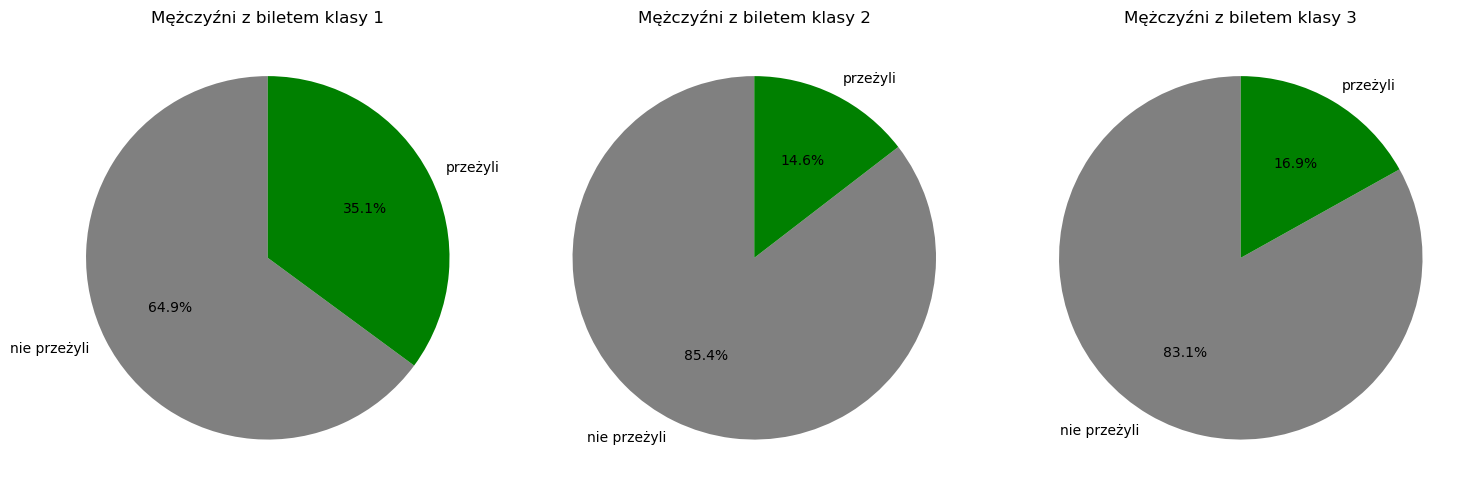

In [32]:
mężczyźni_pasażerowie = df[df['płeć'] == 'mężczyzna']

przeżycie_wg_klasy = mężczyźni_pasażerowie.groupby(['klasa biletu', 'przeżycie int']).size().unstack()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
klasy = [1.0, 2.0, 3.0]
colors = ['grey', 'green']

for i, klasa in enumerate(klasy):
    if klasa in przeżycie_wg_klasy.index:
        data = przeżycie_wg_klasy.loc[klasa]
        axes[i].pie(data, labels=['nie przeżyli', 'przeżyli'], colors=colors, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Mężczyźni z biletem klasy {int(klasa)}')

plt.tight_layout()
plt.savefig('survival_by_class_men.png')

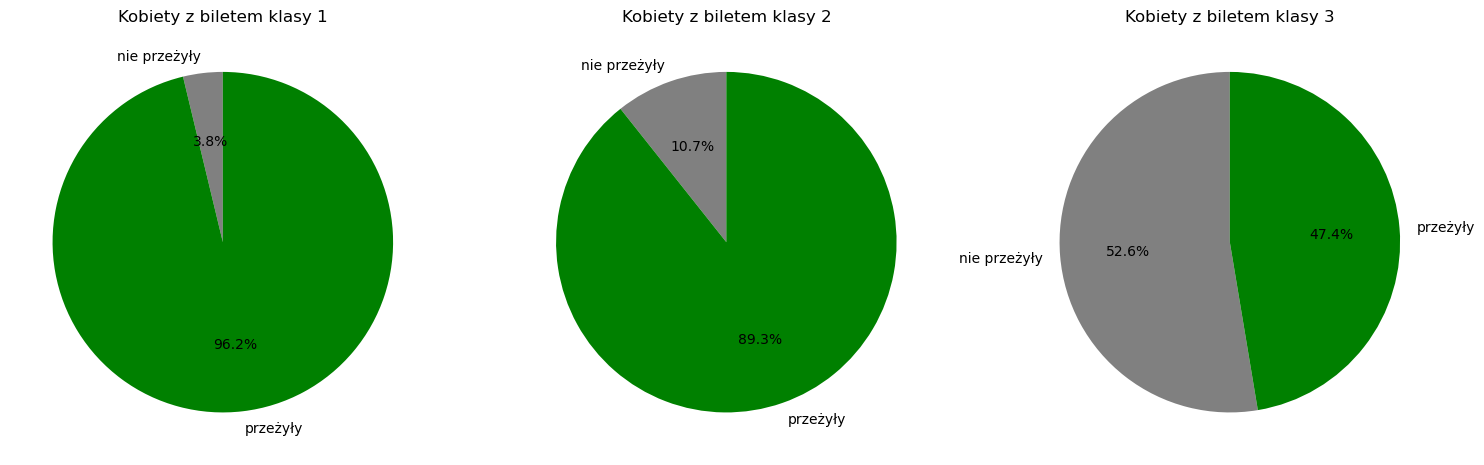

In [33]:
kobiety_pasażerowie = df[df['płeć'] == 'kobieta']

przeżycie_wg_klasy = kobiety_pasażerowie.groupby(['klasa biletu', 'przeżycie int']).size().unstack()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
klasy = [1.0, 2.0, 3.0]
colors = ['grey', 'green']

for i, klasa in enumerate(klasy):
    if klasa in przeżycie_wg_klasy.index:
        data = przeżycie_wg_klasy.loc[klasa]
        axes[i].pie(data, labels=['nie przeżyły', 'przeżyły'], colors=colors, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Kobiety z biletem klasy {int(klasa)}')

plt.tight_layout()
plt.savefig('survival_by_class_women.png')

### Odsetek osób z biletem w danej klasie, które przeżyły lub zginęły w zależności od płci

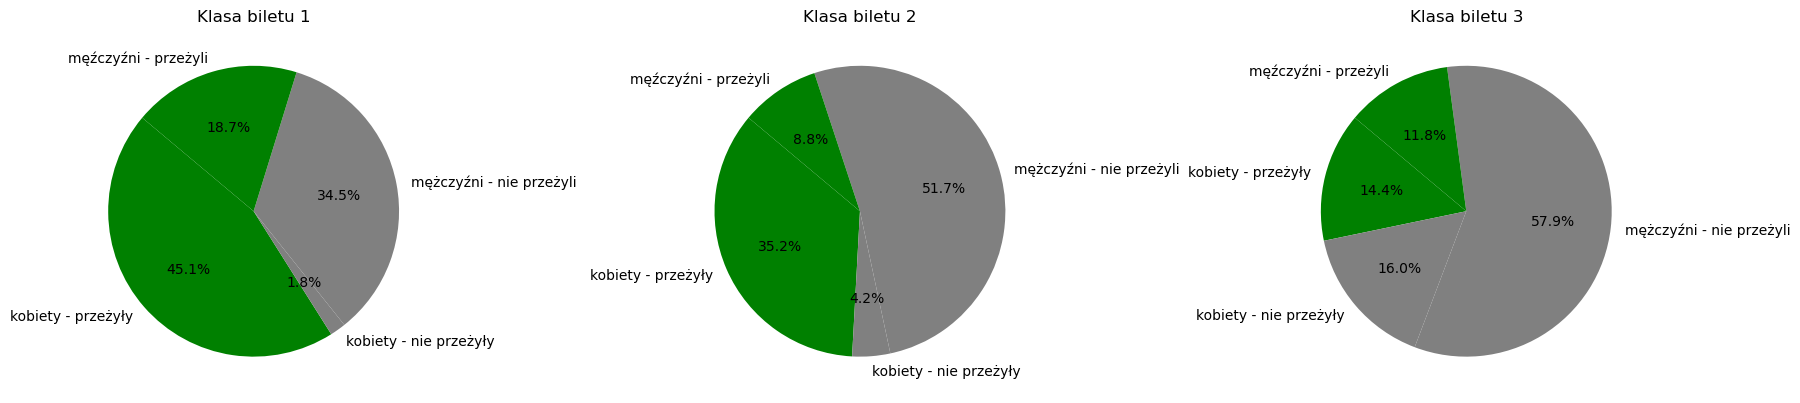

In [34]:
grouped2 = df.groupby('klasa biletu')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for (klasa, group), ax in zip(grouped2, axes):
    przeżyli_counts = group.groupby(['płeć', 'przeżycie int']).size().unstack(fill_value=0)
    
    labels = ['kobiety - przeżyły', 'kobiety - nie przeżyły', 'mężczyźni - nie przeżyli', 'męźczyźni - przeżyli']
    sizes = [
        przeżyli_counts.loc['kobieta', 1] if 'kobieta' in przeżyli_counts.index else 0,
        przeżyli_counts.loc['kobieta', 0] if 'kobieta' in przeżyli_counts.index else 0,
        przeżyli_counts.loc['mężczyzna', 0] if 'mężczyzna' in przeżyli_counts.index else 0,
        przeżyli_counts.loc['mężczyzna', 1] if 'mężczyzna' in przeżyli_counts.index else 0
    ]
    colors = ['green','grey','grey','green']
    

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(f'Klasa biletu {int(klasa)}')

plt.tight_layout()

plt.savefig('survival_by_gender_and_class.png')

## Wnioski:
- Na podstawie powyższej analizy, wynika że w grupie kobiet wraz ze wzrostem klasy biletu znacząco wzrosła szansa na przeżycie (kobiety z biletem w klasie 1 w 96,2% przypadkach przeżyły, w klasie 2 w 89,3%, a w klasie 3 już tylko w 47,4% kobiet przeżyło).
- Także w grupie badanych mężczyzn, ci z biletem w kasie 1 mieli największą szansę na przeżycie (35,1% mężczyzn z biletem w klasie 1), natomiast mężczyźni z biletami w klasie 2 i 3 mieli zbliżone szanse na przeżycie (przeżyło 14,6% mężczyzn spośród tych z biletem w klasie 2, oraz 16,9% mężczyzn spośród tych z biletem w klasie 3).
- Ostatni wykres pt. "Odsetek osób z biletem w danej klasie, które przeżyły lub zginęły w zależności od płci", ukazuje że dysproporcja kobiet, które przeżyły, względem mężczyzn, którzy przeżyli, zmniejsza się wraz ze spadkiem klasy biletu (por. klasę biletu 1 z 3).

## 4.4. Rozkład wieku dla mężczyzn i kobiet

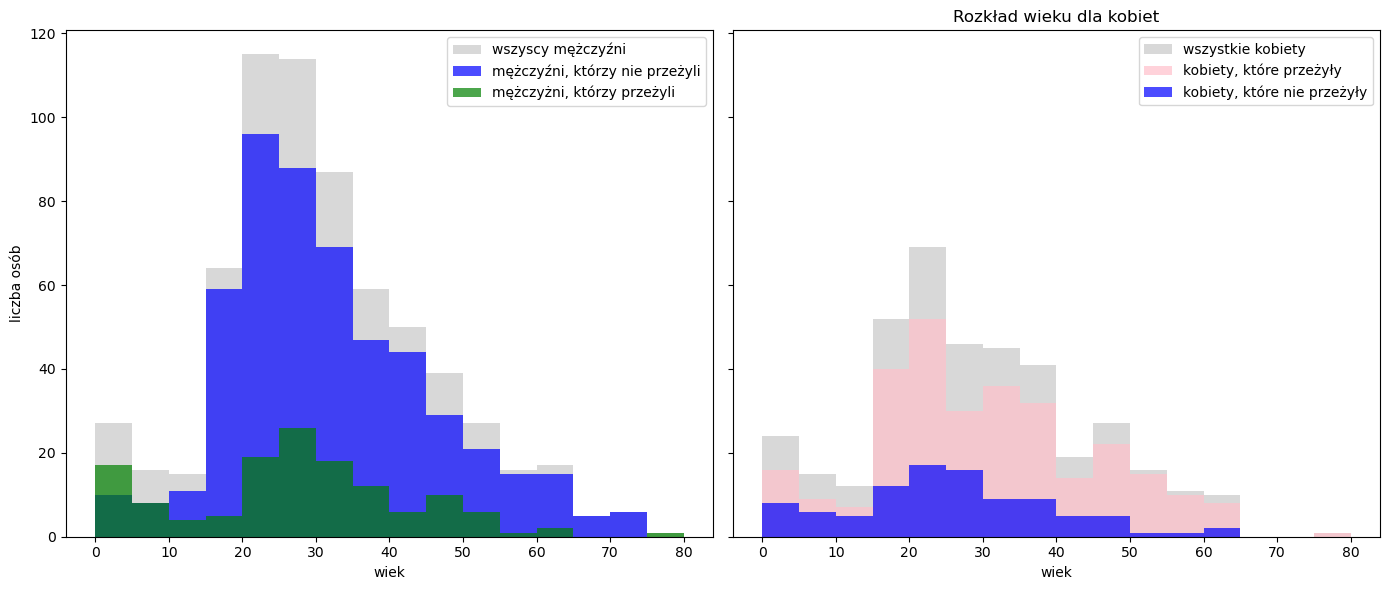

In [35]:
df_male = df[df['płeć'] == 'mężczyzna']
df_female = df[df['płeć'] == 'kobieta']

bins = range(0, 81, 5)  # Age bins from 0 to 80 with a step of 5

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# histogram dla mężczyzn
axes[0].hist(df_male['wiek'], bins=bins, alpha=0.3, label='wszyscy mężczyźni', color='grey')
axes[0].hist(df_male[df_male['przeżycie int'] == 0]['wiek'], bins=bins, alpha=0.7, label='mężczyźni, którzy nie przeżyli', color='blue')
axes[0].hist(df_male[df_male['przeżycie int'] == 1]['wiek'], bins=bins, alpha=0.7, label='mężczyżni, którzy przeżyli', color='green')
axes[0].set_xlabel('wiek')
axes[0].set_ylabel('liczba osób')
axes[0].legend()

# histogram dla kobiet
axes[1].hist(df_female['wiek'], bins=bins, alpha=0.3, label='wszystkie kobiety', color='grey')
axes[1].hist(df_female[df_female['przeżycie int'] == 1]['wiek'], bins=bins, alpha=0.7, label='kobiety, które przeżyły', color='pink')
axes[1].hist(df_female[df_female['przeżycie int'] == 0]['wiek'], bins=bins, alpha=0.7, label='kobiety, które nie przeżyły', color='blue')
axes[1].set_title('Rozkład wieku dla kobiet')
axes[1].set_xlabel('wiek')
axes[1].legend()

plt.tight_layout()
plt.savefig('age_distribution_by_sex_and_survival.png')

## Wnioski
- Średni wiek pasażerów to w przybliżeniu 30 lat.
- Najwięcej podróżujących mężczyzn było w wieku 20-35 lat.
- Najwięcej podróżujących kobiet było w wieku 15-40 lat.
- Z rozkładów wieku dla kobiet i mężczyzn wynika, że grupami uprzywilejowanymi do uzuskania pomocy były osoby najstarsze (75-80 lat) oraz kobiety w wieku 50-60 lat - są to grupy wiekowe, które mają najmnieszy odsetek śmiertelności w katastrofie.

# **5. Podsumowanie**

- W analizie przyjęto ostre kryterium selekcji danych, tzn. wybrano do analizy tylko te rekordy, które miały pełne dane w kluczowych kolumnach ("przeżycie", "płeć", "wiek"). Ostatecznie statystyki zostały obliczone na podstawie próby liczącej 1046 przypadków.
- Uzyskane wyniki pokazały, że największą szansę na przeżcyie w katastrofie Titanica miały osoby podróżujące w 1 klasie.
- W badanej próbie podróżnymi byli w przeważającej części mężczyźni (62,9%), lecz zdecydowanie większe szanse na przeżycie miały kobiety (spośród uratowanych pasażerów, kobiety stanowiły 2/3).